In [400]:
import pandas as pd
data=pd.read_csv("weight.csv")
data.head(4)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470


In [401]:
import matplotlib.pyplot as plt
import numpy as np


<Axes: xlabel='Height', ylabel='Weight'>

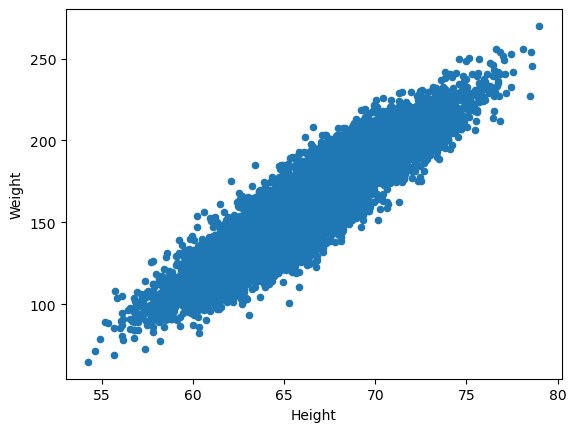

In [402]:
data.plot(kind="scatter",x="Height",y="Weight")

Text(0, 0.5, 'Height')

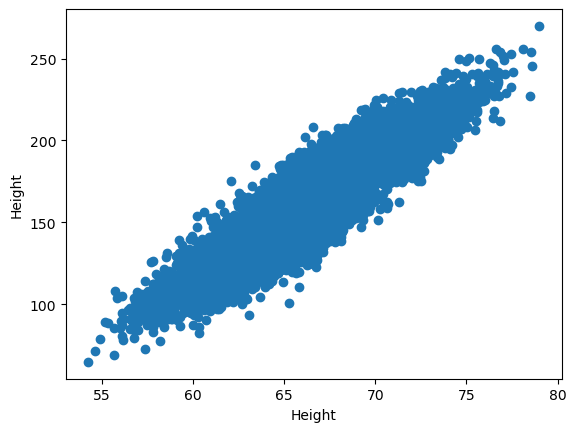

In [403]:
plt.scatter(data["Height"],data["Weight"])
plt.xlabel("Height")
plt.ylabel("Height")

<Axes: xlabel='Height', ylabel='Weight'>

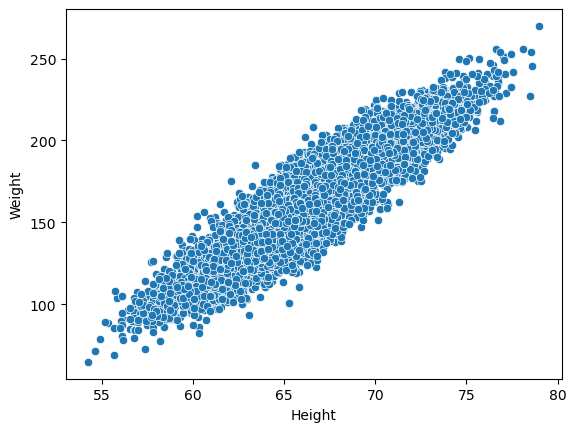

In [404]:
import seaborn as sns
sns.scatterplot(x="Height",y="Weight",data=data)

In [405]:
data.corr()

/var/folders/qr/kwrllgv94x5c1gbsx4mq67440000gn/T/ipykernel_65952/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


/Users/sharafunneesapp/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


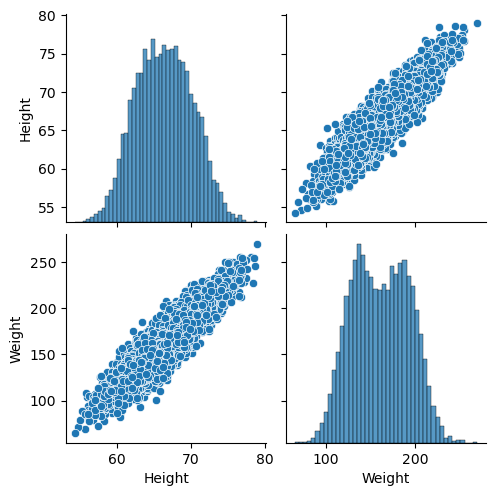

In [406]:
sns.pairplot(data)

In [407]:
x=data[["Weight"]] #independent feature should be dataframe or 2 dimensional array
y=data["Height"] #can have series or 1d array

In [408]:
y

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

#### When you split your dataset into training and testing sets, the division is done randomly,but if you want to get the same split every time you run the code,you can set the random_state parameter to a specific integer value.This makes the split deterministic, meaning you will get the same training and testing sets on multiple runs.

In [409]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)


In [410]:
#standardisation
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest) #because the same mean and standard deviation to use in test data also. and DATA LEAKAGE

In [411]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [412]:
model.fit(xtrain,ytrain)

LinearRegression()

In [413]:
model.coef_

array([3.51014838])

In [414]:
model.intercept_

66.40415330944039

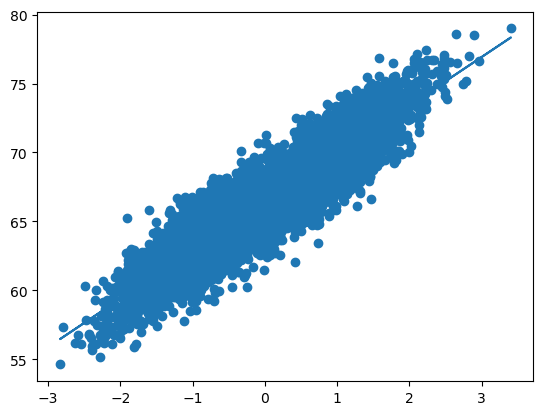

In [415]:
plt.scatter(xtrain,ytrain)
plt.plot(xtrain,model.predict(xtrain))

In [416]:
ypred=model.predict(xtest)

In [417]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,r2_score

In [418]:
mse=mean_squared_error(ytest,ypred)
mae=mean_absolute_error(ytest,ypred)
score=r2_score(ytest,ypred)

In [419]:
print("mse:",mse,"\n","mae:",mae)

mse: 2.110412411148974 
 mae: 1.1635364863559083


In [420]:
1-(1-score)*(len(ytest)-1)/(len(ytest)-xtest.shape[1]-1) #adjusted rsquare

0.864175706237643

In [421]:
#predict new data
model.predict(scaler.transform([[45]]))

/Users/sharafunneesapp/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([53.54706369])

# OLS

In [422]:
import statsmodels.api as sm

In [423]:
model=sm.OLS(ytrain,xtrain).fit()

In [424]:
ypred1=model.predict(xtest)

In [425]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              19.55
Date:                Tue, 17 Sep 2024   Prob (F-statistic):                    9.96e-06
Time:                        01:30:27   Log-Likelihood:                         -39305.
No. Observations:                7000   AIC:                                  7.861e+04
Df Residuals:                    6999   BIC:                                  7.862e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.5101      0.794      4.421      0.000       1.954       5.066
==============================================================================
Omnibus:                        3.130   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.209   Jarque-Bera (JB):                3.084
Skew:                          -0.046   Prob(JB):                        0.214
Kurtosis:                       3.045   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""